## 补充
* 这个程序为简单的三层结构组成：输入层、中间层、输出层



In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


(200, 1)


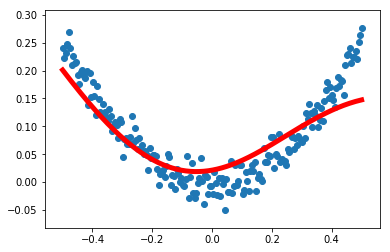

In [25]:
# 使用mp生成200个点 等差数列：linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) 
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]# 转化为200列 reshape(-1,1)也可以
print(x_data.shape)
noise =np.random.normal(0, 0.02, x_data.shape)# 生成随机值和x_data同样的行列数字  (200, 1)一样
y_data=np.square(x_data)+noise


# 定义两个placeholder  形参
x = tf.placeholder(tf.float32, [None,1])# 行取决于，1列
y = tf.placeholder(tf.float32, [None,1])# 行，1列

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1,10])) # 一行十列 （ 一个输出单元，10个中间层）
biases_L1 = tf.Variable(tf.zeros([1,10])) # 一行
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1) # i激活函数tf.nn.tanh

# 定义神经网络输出层

Weights_L2 = tf.Variable(tf.random.normal([10, 1])) # 
biases_L2 = tf.Variable(tf.zeros([1,1])) # 
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2) # i激活函数tf.nn.tanh

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(200):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict = {x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data) # scatter散点图
    plt.plot(x_data, prediction_value, 'r-',lw=5)

